In [46]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [47]:
df = pd.read_csv(r"C:\Users\M\Downloads\groceries - groceries.csv")
df.head()


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
item_columns = df.columns[1:]

transactions = []

for index, row in df.iterrows():
    transaction = [item for item in row[item_columns] if pd.notnull(item)]
    transactions.append(transaction)


transactions[:5]


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [50]:
from collections import Counter

all_items = [item for transaction in transactions for item in transaction]
item_frequencies = Counter(all_items)

item_frequencies.most_common(10)


[('whole milk', 2513),
 ('other vegetables', 1903),
 ('rolls/buns', 1809),
 ('soda', 1715),
 ('yogurt', 1372),
 ('bottled water', 1087),
 ('root vegetables', 1072),
 ('tropical fruit', 1032),
 ('shopping bags', 969),
 ('sausage', 924)]

In [ ]:
min_support = 0.05
total_transactions = len(transactions)

frequent_items = {item: count/total_transactions for item, count in item_frequencies.items() if count/total_transactions >= min_support}

frequent_items


{'citrus fruit': 0.08276563294356888,
 'margarine': 0.05856634468734113,
 'tropical fruit': 0.10493136756481952,
 'yogurt': 0.13950177935943062,
 'coffee': 0.05805795627859685,
 'whole milk': 0.25551601423487547,
 'pip fruit': 0.07564819522114896,
 'other vegetables': 0.1934926283680732,
 'butter': 0.05541433655312659,
 'rolls/buns': 0.18393492628368074,
 'bottled beer': 0.08052872394509406,
 'bottled water': 0.11052364006100661,
 'curd': 0.05327910523640061,
 'beef': 0.05246568378240976,
 'frankfurter': 0.058973055414336555,
 'soda': 0.17437722419928825,
 'fruit/vegetable juice': 0.0722928317234367,
 'newspapers': 0.07981698017285206,
 'pastry': 0.08896797153024912,
 'root vegetables': 0.10899847483477376,
 'canned beer': 0.07768174885612608,
 'sausage': 0.09395017793594305,
 'brown bread': 0.06487036095577021,
 'shopping bags': 0.09852567361464158,
 'napkins': 0.05236400610066091,
 'pork': 0.05765124555160142,
 'whipped/sour cream': 0.07168276563294357,
 'domestic eggs': 0.0634468734

In [52]:
from mlxtend.frequent_patterns import fpgrowth,apriori
from mlxtend.preprocessing import TransactionEncoder

filtered_transactions = [
    [item for item in transaction if item in frequent_items]
    for transaction in transactions
]

te = TransactionEncoder()
te_ary = te.fit(filtered_transactions).transform(filtered_transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df_trans, min_support=min_support, use_colnames=True)

frequent_itemsets


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.193493,(other vegetables)
8,0.055414,(butter)
9,0.183935,(rolls/buns)


In [ ]:

frequent_itemsets2 = apriori(df_trans, min_support=min_support, use_colnames=True)

frequent_itemsets2


,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=10)

rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,1.0,0.020379,1.102157,0.488608,0.165267,0.092688,0.310432
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432
2,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817
3,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
4,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776
5,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776


In [55]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1.0, num_itemsets=10)

rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,1.0,0.020379,1.102157,0.488608,0.165267,0.092688,0.310432
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432


In [ ]:
filtered_rules2 = rules2[(rules2['lift'] > 1) & (rules2['confidence'] > 0.5)]

filtered_rules2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


C:\Users\M\AppData\Local\Temp\ipykernel_7684\3557618683.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="confidence", y="antecedents", data=rules_sorted2.head(10), palette='viridis')


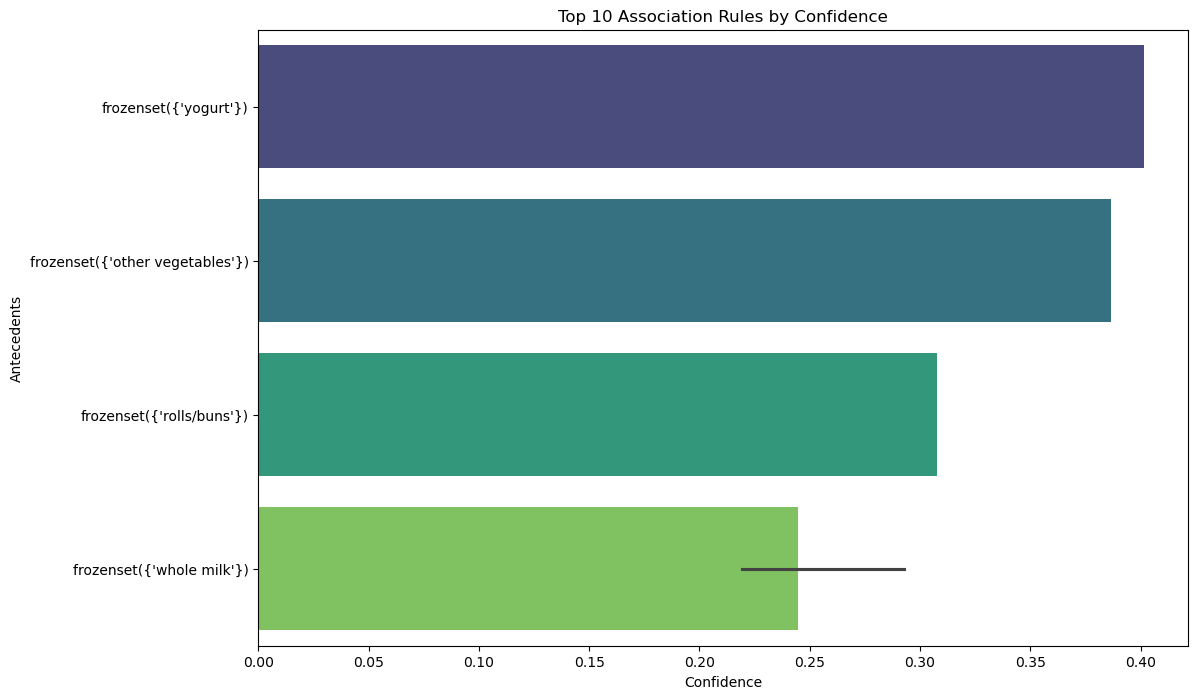

C:\Users\M\AppData\Local\Temp\ipykernel_7684\3557618683.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="lift", y="antecedents", data=rules_sorted2.head(10), palette='coolwarm')


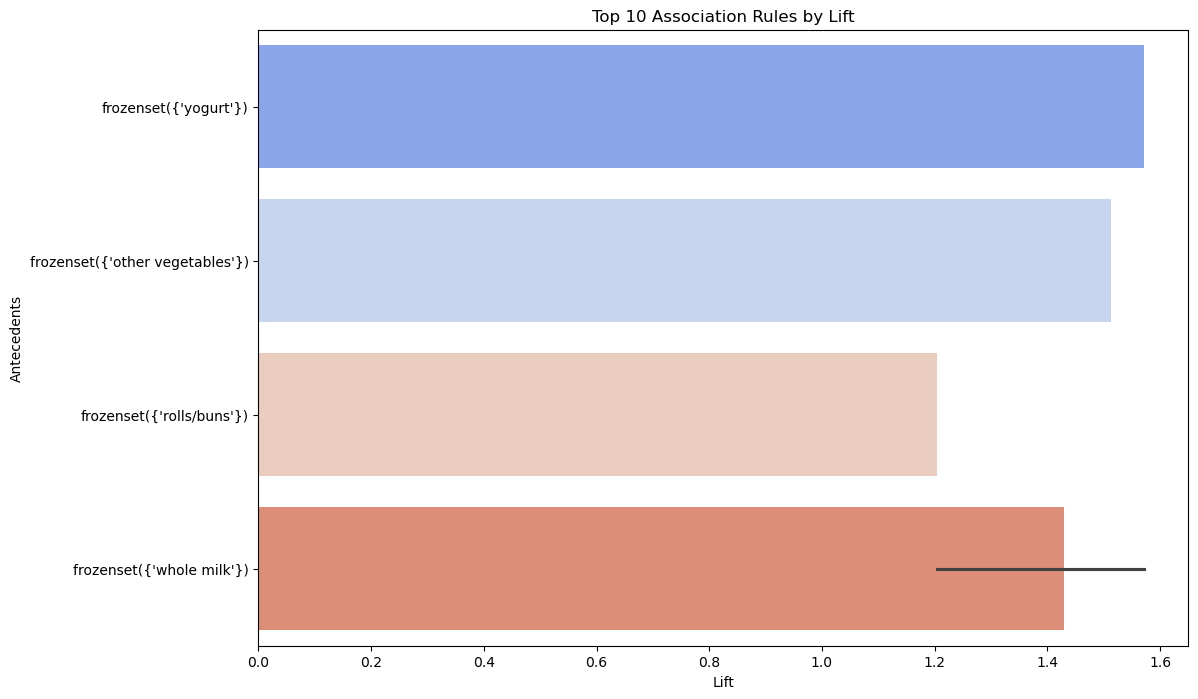

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

rules_sorted2 = rules2.sort_values('confidence', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="confidence", y="antecedents", data=rules_sorted2.head(10), palette='viridis')
plt.title("Top 10 Association Rules by Confidence")
plt.xlabel("Confidence")
plt.ylabel("Antecedents")
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x="lift", y="antecedents", data=rules_sorted2.head(10), palette='coolwarm')
plt.title("Top 10 Association Rules by Lift")
plt.xlabel("Lift")
plt.ylabel("Antecedents")
plt.show()

C:\Users\M\AppData\Local\Temp\ipykernel_7684\2155733457.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="confidence", y="antecedents", data=rules_sorted.head(10), palette='viridis')


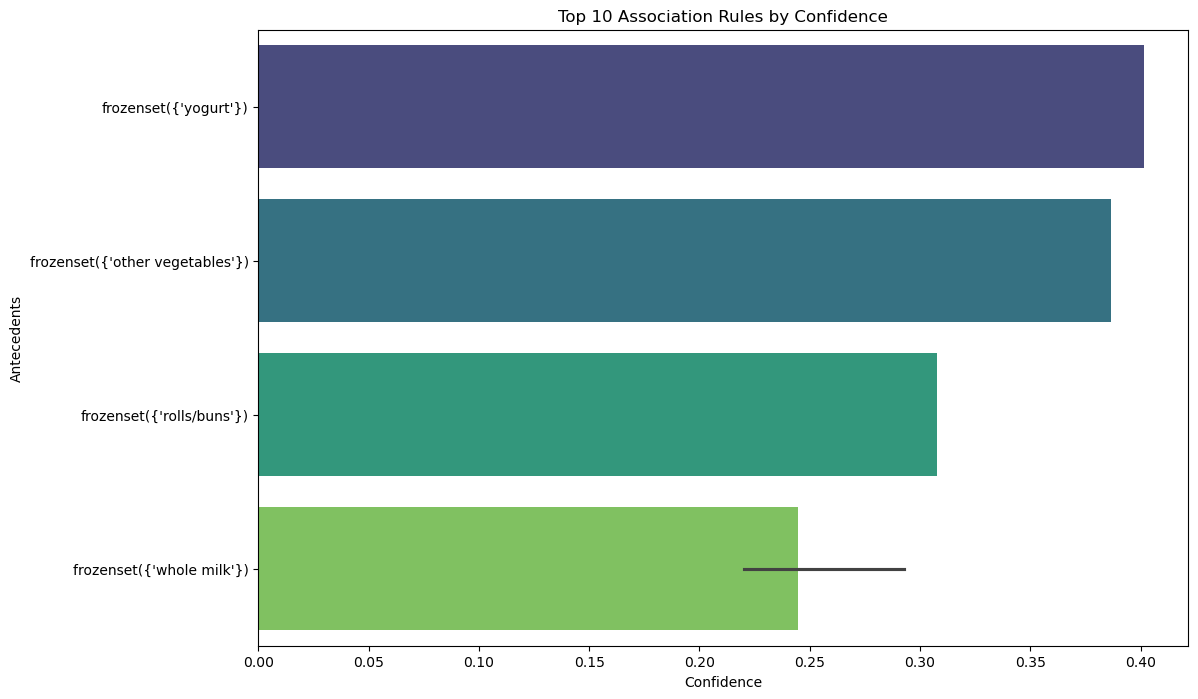

C:\Users\M\AppData\Local\Temp\ipykernel_7684\2155733457.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="lift", y="antecedents", data=rules_sorted.head(10), palette='coolwarm')


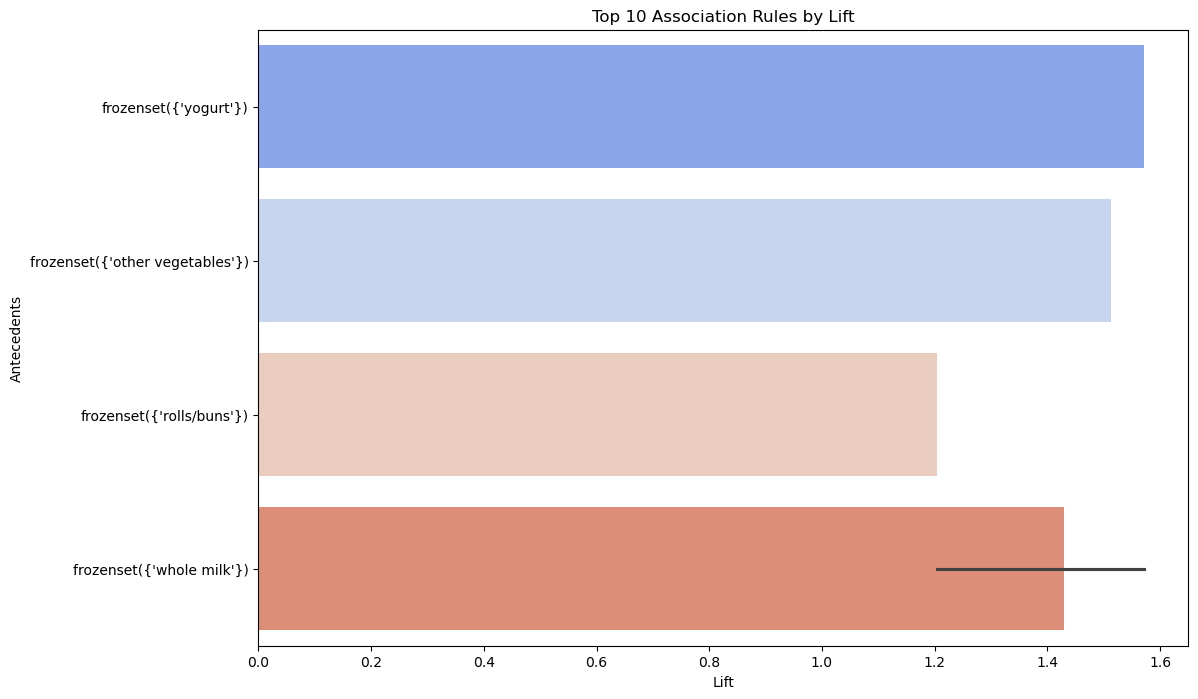

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

rules_sorted = rules.sort_values('confidence', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="confidence", y="antecedents", data=rules_sorted.head(10), palette='viridis')
plt.title("Top 10 Association Rules by Confidence")
plt.xlabel("Confidence")
plt.ylabel("Antecedents")
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x="lift", y="antecedents", data=rules_sorted.head(10), palette='coolwarm')
plt.title("Top 10 Association Rules by Lift")
plt.xlabel("Lift")
plt.ylabel("Antecedents")
plt.show()


In [59]:
mean_confidence = rules['confidence'].mean()
mean_lift = rules['lift'].mean()

print(f"Average Confidence: {mean_confidence:.4f}")
print(f"Average Lift: {mean_lift:.4f}")


Average Confidence: 0.3050
Average Lift: 1.4301


In [60]:
mean_confidence2 = rules2['confidence'].mean()
mean_lift2 = rules2['lift'].mean()

print(f"Average Confidence: {mean_confidence2:.4f}")
print(f"Average Lift: {mean_lift2:.4f}")


Average Confidence: 0.3050
Average Lift: 1.4301
